<a href="https://colab.research.google.com/github/thad75/TP_ENSEA_ELEVE/blob/main/3A/SIA/TDm/TD_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Deep Learning : Tutorial

Welcome to this Tutorial.
This might be your first time in Deep Learning. Don't worry, we will guide you.

This tutorial will introduce you to various models:

<img src="https://i.imgflip.com/6u9pe5.jpg" title="Oui Oui " height=480>





The goal of this tutorial : 

*   Direct application of DL Course
*   Understand the differences between differents networks
*   Use Pytorch to create and train a Neural Network
*   Learn the Basic Workflow of a Deep Learning engineer.
*   Introducing you to some of the useful DL Frameworks


---


**Questions are in bold characters**


---

The tutorial is composed of two main parts :  
* a Warmup on PyTorch
* a Real Task

The same task of classification will be used for all the tutorial. Only the dataset will change between the warmup and the real task

Don't forget to activate your GPU by going to : 
Exécution -> Modifier le type d'éxecution -> GPU

In [4]:
!pip install torchmetrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 529 kB 7.7 MB/s 


In [2]:
import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms
import torch
import torchvision
import torchvision.transforms as transforms
import os
import cv2
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import random
import torch.optim as optim
from tqdm import tqdm
from torchmetrics import Accuracy
import matplotlib.pyplot as plt
torch.manual_seed(42)
import numpy as np

# A Simple Neuron

Let's introduce a Simple Task. 
Given a boolean value (0 or 1), we want the model to invert the input value. 
Example : if the model's input is 0, we want it to output 1.

In order to perform this task, we will need few elements:
* a Dataset
* a Model
* a Training/Testing Loop
* Some hyperparameters

## a - The Simple Dataset and Dataloader

As you know, to train a model you will need data. In practice before choosing/creating a model, we usually have a look on the Dataset. These datas come in the form of labeled or unlabeled data. 

In Pytorch, datasets inherits from the Dataset class. It is a simple class composed of minimum 3 methods :
* __init__ : to initialize the class
* __getitem__ : to retrieve a sample according to a index number
* __len__ : to return the len of the entire Dataset

In our case, we will generate a list of 0 and 1. The __getitem__ method should return the opposite value of the element picked at the given index.

In [3]:
class SimpleDataset(Dataset):

  def __init__(self, len_data):

    self.len_data = len_data
    self.data = [random.randint(0,1) for i in range(len_data)] # This list of length len_data is filled with 0 and 1 

  def __getitem__(self,idx):
    # We select as data the value at index idx of the self.data list
    data = self.data[idx]
    label = ... if self.data[idx]== 0 else ...
    # TODO : Return a dictionnary {'data': .., 'label':}
    return {"data":torch.as_tensor(), 
            "label": torch.as_tensor()}

  def __len__(self):
    # Explanation : We know that the total length of the dataset is the length of the self.data attribute
    return len(self.data)

# TODO : Create dataset_train and dataset_test by initializing the Classes. You can choose a big value for the size of the list
len_dataset_train = len_dataset_test= ...
dataset_train = SimpleDataset(len_dataset_train)
dataset_test = SimpleDataset(len_dataset_test)

The Dataloader is used to fetch batches of data to send them at the same time to the GPU. A DataLoader needs a batch size. Other attributes of the DataLoader class exists but we won't use them.

In [4]:
dataset_train = DataLoader(dataset_train, batch_size= 2048)
dataset_test = DataLoader(dataset_test, batch_size= 2048)

## b - The Simple Model

First time coding a neural net ? Let's think a little bit.
Questions : 
* **What kind of task is it ?**
*  **Is one neuron enough to perform the inversion of a boolean ?**
* **Given an input x, a weight b, a bias b and an activation function f, how do we modelize a Single Neuron ?**

Creating a Model in PyTorch is pretty simple. We initalize a Class that inherits from nn.Module. 

It is defined as follows:


```
class Model(nn.Module):
  def __init__(self,...):
    """"
    Defines the model. You can put the input size as a parameter if needed..
    """"
    super().__init__() #to init the main class
    self.layers = ... # defining the model : could be Conv2d, Linear, RNN, LSTM


  def forward(self,x):
    """
    The input x is forwarded through the neural net. 
    """
    output = self.layers(x)
    return output
```

More informations : https://pytorch.org/docs/stable/nn.html



**Using a nn.Parameter, create a single Neuron model.**

In [5]:
class SimpleModel(nn.Module):
    def __init__(self,):
      super().__init__()
      # Note : We initialize randomly the valuees of the weights and the biases as these are learned through the training
      self.w = nn.Parameter(torch.tensor(random.random()), requires_grad =True) # Weight
      # TODO : by looking at the weight parameter (self.w) initialize the bias
      self.b =  # Bias
      # TODO : add a Sigmoid Activation layer
      self.sigmoid = 

    def forward(self,x):
      # TODO : Using the famous formula of a single neuron, compute the value of x1 : the output of the neuron
      x1 = 
      # TODO : Pass x1 through the activation layer
      x1 = 
      return x1

In [6]:
# TODO : Create an instance of the SimpleModel and print the layers it has using print()
model = 
print(model)

SimpleModel(
  (sigmoid): Sigmoid()
)


## c- The Simple Training

As of now, we are supposed to have the model and the dataset. Hence, we need to create the training loop and initialize some useful object for the training.


The training loop is defined as follows :


```
for epoch in num_epoch : 
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):        
        data = data.to(device)
        optimizer.zero_grad()
        outputs = net(data)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i == ??:
          running_loss= running_loss/??



As you can see, there are some obscure words that we didn't define yet.

### i - Optimizer

Optimizers are algorithms or methods used to minimize an error function (loss function) or to maximize the efficiency of production. A learning rate must be defined. The learning rate handles the step of the Gradient Descent update. Here, we will use stochastic gradient descent (SGD)

In [7]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

### ii - Criterion 

This is basically the loss function. It measures the differences between the output and the input. We want to minimize it. 


**Which Loss function will we be using in this Binary Classification Task ?**

In [8]:
# TODO : Initialize a criterion. Choose between BCELoss or MSELoss. More Information in https://pytorch.org/docs/stable/nn.html#loss-functions
criterion = 

SyntaxError: ignored

### iii - Num Epoch 

The number of epoch corresponds to the number of time, the model will see the samples from the dataset

In [ ]:
# TODO : Choose a number of epochs 
num_epochs = 

### iv - Device 

Once the model initialized, we prefer accelerating the training. Hence, we send it to the GPU to profit from the parralelisation property of GPUs (Coucou HSP). To send it you have to define a device as follows:

```
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
```
To send your model or data to device : 



```
model = model.to(device) or data = data.to(device)
```




In [9]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### v - Gathering everything under a Loop

Let's gather everything under a Training loop and a Testing loop.
* The training loop will update the weights of the model
* The testing loop will only test the model without updating anything.


**Fill in the blanks**

In [ ]:
# Defining the Training Loop :
# Define Device :
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# TODO : Create an Instance of the Model
model = ....to(device)

# Define your device : 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# TODO : Define your optimizer. Don't forget your learning rate :
lr = ...
optimizer = ...

# TODO : Define your criterion :
criterion = ...

# TODO : Define your number of epochs :
n_epoch = ...

# Initializing some stuff for visualization
loss_train, loss_test = [], []


for epoch in range(n_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(dataset_train, 0):
        # TODO : Get the inputs. data is a dictionnary with keys : data and label
        inputs, labels = ... .to(device), ... .to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # TODO : Send the input through the model
        outputs = model(...)

        # TODO : Compute the loss between the ouputs and the targets
        loss = criterion(..., labels.float())

        # update the weights using backward and optimizer
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 19:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss train: {running_loss / 2000:.3f}')
            running_loss = 0.0
    loss_train.append(running_loss/i)

    # Explanation : We don't need gradients here as we are not updating anything. This we call torch.no_grad()
    with torch.no_grad():
      for i, data in enumerate(dataset_test, 0):
        # TODO : Get the inputs. data is a dictionnary with keys : data and label
        inputs, labels =....to(device), ...

        # TODO : Send the input through the model
        outputs = model(...)
        running_loss += loss.item()
        if i % 100 == 19:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss test: {running_loss / 2000:.3f}')
            running_loss = 0.0
    loss_test.append(running_loss/i)

print('Finished Training')

### vi - Let's visualize some stuff

As you could see we have to lists where we logged loss values each epochs. Let's plot them to see if the model is overfitting/underfitting.
* **What can you tell on your model's training ?**
* **Can we actually tell if the model is overfitting or not ? Why ?**

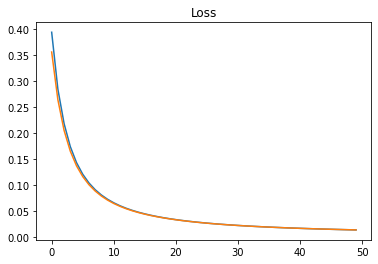

In [11]:
from matplotlib import pyplot as plt
plt.title('Loss')
plt.plot(...)
plt.plot(...)

# Linear Layers

One Neuron can perfom a lot of easy task. However, it is quickly limited when it comes to complex tasks.

* **Can a Single Neuron perform a XOR calculation ? Can you prove it ? How many neurons do we need at minimum to perform XOR ?**



The simple answer is no. We can obviously recreate a Model with lots of parameters but why bother when Engineer's wrote the Linear Layer to help us.

The Linear Layer from Pytorch is a Layer composed of 1 or more neurons. Hence, we can learn more complex representation of the data. The linear layer takes fixed size input. 


<img src="https://docs.nvidia.com/deeplearning/performance/dl-performance-fully-connected/graphics/fc-layer.svg">




## Some Downloads 

These are some downloads. Don't bother understanding it.

In [ ]:
!pip install gdown
!gdown --id 1OGlSEVyhm06uJ-yusufl8A7poAHzuose
!gdown --id 1CNVhbhDMCvGIYdyUv_H5kSsTflEzyI-s
!unzip /content/test1.zip
!unzip /content/train.zip

## a - Another Dataset 

Let's introduce an Intermediate Task. Given images of dogs and cats, we want the model to classify whether the input image is an image of a dog or a cat. We will use this task for the rest of the tutorial.

#### Data Exploration

Let's have a look on the Dataset. 
* **Using Matplotlib.Pyplot or cv2_imshow plot some images of the folder** 
* **Are the sizes of the images the same ? If no, what issue could occur for the training regarding the Model ?**

In [13]:
import os

# Loading the files from the folder
def return_files(path):
  return [path + i for i in os.listdir(path)]

path_train = '/content/train/'
path_test ='/content/test1/'

train_images = return_files(path_train)
test_images = return_files(path_test)
print(train_images)

['/content/train/cat.7696.jpg', '/content/train/cat.5883.jpg', '/content/train/dog.6003.jpg', '/content/train/cat.3541.jpg', '/content/train/cat.3068.jpg', '/content/train/dog.2252.jpg', '/content/train/cat.10867.jpg', '/content/train/cat.774.jpg', '/content/train/dog.10655.jpg', '/content/train/dog.5838.jpg', '/content/train/cat.7213.jpg', '/content/train/cat.7514.jpg', '/content/train/cat.8923.jpg', '/content/train/dog.9326.jpg', '/content/train/dog.417.jpg', '/content/train/dog.6331.jpg', '/content/train/dog.6053.jpg', '/content/train/cat.11445.jpg', '/content/train/dog.4831.jpg', '/content/train/dog.410.jpg', '/content/train/cat.11242.jpg', '/content/train/dog.2584.jpg', '/content/train/dog.4863.jpg', '/content/train/dog.5206.jpg', '/content/train/dog.669.jpg', '/content/train/dog.9465.jpg', '/content/train/cat.11654.jpg', '/content/train/dog.4709.jpg', '/content/train/dog.9992.jpg', '/content/train/dog.4755.jpg', '/content/train/cat.6420.jpg', '/content/train/cat.11873.jpg', '/con

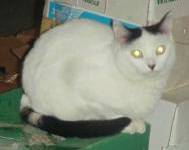

In [14]:
import cv2
from google.colab.patches import cv2_imshow
im = cv2.imread(train_images[1])
cv2_imshow(im)

It's some Doggos and Cattos. 

### Transformations

One issue could appear when training a Model on images of differents sizes : each image of the dataset could have a different size.
 
*   But how would the Linear Layer handle that ?



In fact, the linear layer can't handle that. We have to provide a fixed size input for the layer. One way is to resize the Image to a fixed size. It is where torchvision comes as a handy tool. It proposes a Transform Pipeline able to perform some Transformations on the input data, such as Normalization, Resizing, Blurring...

Other Tools : Albumentations, Kornia..


In [15]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((128,128)),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [16]:

class IntermediateDataset(Dataset):

  def __init__(self,list_images, transforms = None):
    self.list_images = list_images
    self.transforms = transforms

  def __getitem__(self,idx):
    # Returns a piece of data that corresponds to element idx.
    image = self.list_images[idx]
    label = image.split('.')[0].split('/')[-1]
    label = 1 if label =='dog' else 0
    image = cv2.imread(image)
    if self.transforms:
      image = self.transforms(image)
    # TODO : Return a dictionnary {'data': .., 'label':}
    return {'data':image, 'label':torch.as_tensor(label)}
    
  def __len__(self):
    # Returns the len of the entire Dataset
    return len(self.list_images)

We obviously have 2 datasets : the training and the testing dataset. In other scenarios we will also have a validation dataset.

*   The training dataset is used to train the model
*   The testing dataset is used to test the model

There's one particularity in the testing dataset. It doesn't have usable label. Hence we will create a validation dataset from the training dataset and use it for testing.



In [17]:
dataset_train = IntermediateDataset(train_images, transform)
dataset_test = IntermediateDataset(test_images, transform)
train_size = int(0.8 * len(dataset_train))
test_size = len(dataset_train) - train_size

dataset_train, dataset_validation =  torch.utils.data.random_split( dataset_train, [train_size, test_size])

dataset_train = DataLoader(dataset_train, batch_size = 100)
dataset_test = DataLoader(dataset_test, batch_size = 20)
dataset_valid = DataLoader(dataset_validation, batch_size=10)

**Verifiy that the labels on the Datasets are correct**

In [ ]:
# Just to verify is the validation dataset contains label.
for i, data in enumerate(dataset_valid):
  # TODO : Print some label and plot their images
  ...
  if i == 1 : break

## b- The Intermediate Model

The intermediate model will consist of one Linear Layer. The size of the input is known. But to reuse the model, we need to parametrize the input value attribute of the Linear Layer to make it usable for future works. 

Important Thing : Linear layers take a 1-D Tensor as input. So we will need to reshape the input tensors.

**Create a IntermediateModel composed of One layer and its activation**

In [19]:
class IntermediateModel(nn.Module):

  def __init__(self, input_size):
    super().__init__()
    # TODO : Define your model here. It should be 1 layer and a activation function
    self.layer = ...
    self.sigmoid = ...
  def forward(self,x):
    # TODO : Define how your data passes the model
    output = ...
    output = ...
    return output

## c - Creating a Training Loop

As usual, create the training loop.
**What changes from the previous training ?**

In order to compute the accuracy of the model on the testing set, we will use torchmetrics.


The accuracy is defined as 
$\frac{Correct Classification}{All  Classification}$.


We will define a threshold defining if a predicted class belongs to a class Dog or Cat. Here, we define the threshold as 0.5

In [ ]:
# Defining the Training Loop :
# Define Device :
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# TODO : Create an Instance of the Model
input_size = ...
model = ....to(device)

# Define your device : 
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Define your optimizer :
lr = 1e-3
optimizer = optim.SGD(model.parameters(), lr=lr)

# TODO : Define your criterion :
criterion = ...

# Define your Accuracy
accuracy = Accuracy(threshold = 0.5).to(device)

#Define your number of epochs :
n_epoch = 2

# Initializing some stuff for visualization
loss_train, loss_test = [], []


for epoch in range(n_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(dataset_train, 0):
        # Get the inputs. data is a dictionnary with keys : data and label
        inputs, labels = data['data'].to(device), data['label'].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # TODO : Manipulate the input Data so that its shape is BS,Input Size. It will hence fit into the Linear Layer.
        inputs = inputs.reshape(...) # Shape must be Batch Size, -1

        # TODO : Send the input through the model
        outputs = ...
        # print(outputs.shape)

        # Compute the loss between the ouputs and the targets
        loss = criterion(outputs.squeeze(-1), labels.float())
        acc = accuracy(outputs.flatten(), labels)

        # update the weights using backward and optimizer
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        running_acc += acc.item()
        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss train: {running_loss / 100:.3f} acc train: {running_acc /100:.3f}')
            running_loss = 0.0
            running_acc = 0.0

    loss_train.append(running_loss/i)
    # Explanation : We don't need gradients here as we are not updating anything. This we call torch.no_grad()
    with torch.no_grad():
      for i, data in enumerate(dataset_valid, 0):
        # TODO : Get the inputs. data is a dictionnary with keys : data and label
        inputs, labels = data['data'].to(device), data['label'].to(device)
        inputs = 

        # TODO : Send the input through the model
        outputs = model(inputs)
        # TODO : Compute the accuracy
        acc = accuracy(...,...)
        running_loss += loss.item()
        running_acc += acc.item()

        if i % 100 == 99:    # print every 100 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss test: {running_loss / 100:.3f} acc test: {running_acc / 100:.3f}')
            running_loss = 0.0
            running_acc = 0.0

    loss_test.append(running_loss/i)

print('Finished Training')

Plot the training loss curves.
**What can you say ?**

We will now test the model on few input images. Let's see of the model is actually good or not.

**Send some Images of the Testing Dataset to the model, and look at the predictions**

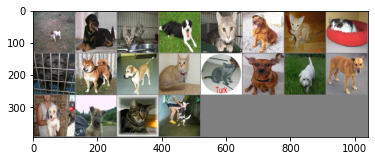

GroundTruth:    cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat   cat
Predicted:    dog   cat   cat   dog   dog   dog   dog   cat   dog   dog   cat   dog   dog   dog   dog   dog   dog   dog   cat   dog


In [21]:
dataiter = iter(iter(dataset_test))
data = dataiter.next()
images, labels = data.values()
# TODO : Perform the inference
# TODO1 : Send image to device
images = ...
# TODO2 : Reshape the image
images = ...
# TODO3 : Forward
predicted = ...
classes = ( 'cat', 'dog')

# Plot Images
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    npimg = np.transpose(npimg, (1, 2, 0))
    npimg = cv2.cvtColor(npimg, cv2.COLOR_BGR2RGB)
    plt.imshow(npimg)
    plt.show()

def binarize(x, thresh):
    return 1 if x > thresh else 0

# TODO : Binarize the prediction using 0.5 as threshold and print the predicted classes.
print('Predicted: ', ' '.join('%5s' % classes[...] for j in range(images.shape[0])))

# TODO : Visually compare the prediction to the Images

In fact, to get something to compare to, we will compute the accuracy on the validation dataset.
* **Compute the Accuracy on the Validation Dataset**

In [22]:
accuracy = Accuracy(threshold = 0.5).to(device)
running_acc = 0.0
with torch.no_grad():
  for i, data in enumerate(dataset_valid, 0):
    # TODO : Get the inputs. data is a dictionnary with keys : data and label
    inputs, labels = data['data'].to(device), data['label'].to(device)
    inputs = inputs.reshape(inputs.shape[0],-1)
    # TODO : Send the input through the model
    outputs = model(inputs)
    acc = accuracy(outputs.flatten(), labels)
    running_acc += acc.item()

print('Accuracy in Dataset Valid is ',running_acc/(len(dataset_valid)) )

Accuracy in Dataset Valid is  0.596800006210804


## d - Going Further on Linear Layers

As you can see, a lot of code is just some copy paste. Depending on the company you work for, a lot of code is already written. Usually, we create a function or a  **Trainer** class to handle the Training. 
The Trainer usually has :
* a Training method
* a Testing method

A Trainer allows modularity during training as the model, the data are just attributes of the Trainer.
We provide you the code for a really simple Trainer. Have a look at it.

For the rest of the tutorial, we will use the Trainer class


In [23]:
class Trainer():

  def __init__(self, model, dataset_train, dataset_test, criterion, optimizer, device = 'cuda'):

    self.model = model.to(device)
    self.dataset_train = dataset_train
    self.dataset_test = dataset_test
    self.criterion = criterion
    self.optimizer = optimizer
    self.device = device
    self.accuracy = Accuracy(threshold = 0.5).to(device)
    self.epoch = 0
  def forward(self,x):
    x = x.reshape(x.shape[0],-1)
    x = self.model(x)
    return x 

  def train(self):
    
      running_loss = 0.0
      running_acc = 0.0
      for i, data in enumerate(tqdm(self.dataset_train), 0):
          inputs, labels = data['data'].to(self.device), data['label'].to(self.device)
          self.optimizer.zero_grad()
          outputs = self.forward(inputs)
          loss = self.criterion(outputs.squeeze(-1), labels.float())
          acc = self.accuracy(outputs.flatten(), labels)

          loss.backward()
          self.optimizer.step()          
          running_loss += loss.item()
          running_acc += acc.item()
          if i % 100 == 99:    # print every 2000 mini-batches
              print(f'[{self.epoch + 1}, {i + 1:5d}] loss train: {running_loss / 100:.3f} acc train: {running_acc /100:.3f}')
              running_loss = 0.0
              running_acc = 0.0
              
  @torch.no_grad()
  def test(self):
      running_acc = 0.0
      for i, data in enumerate(tqdm(self.dataset_test), 0):
        inputs, labels = data['data'].to(self.device), data['label'].to(self.device)
        outputs = self.forward(inputs)
        acc = self.accuracy(outputs.flatten(), labels)
        running_acc += acc.item()

        if i % 100 == 99:    # print every 2000 mini-batches
            print(f'[{self.epoch + 1}, {i + 1:5d}]acc test: {running_acc / 100:.3f}')
            running_acc = 0.0

  def train_test(self, num_epoch):
      for epoch in range(num_epoch):
        print("Train")
        self.epoch = epoch
        self.train()
        print("Test")
        self.test()



**Using the Trainer:**
* **Change the model for a 2 layered Model. 
(Linear(input_shape, 512)->Linear( 512,1) for example). Don't forget to add some activation layers (ReLU, GeLU,TanH..).** 
* **What does it change to the accuracy of the model ?** 

In [24]:
class IntermediateModel(nn.Module):

  def __init__(self, input_size):
    super().__init__()
    # TODO : Define your model here
    self.layer = nn.Linear(...,...) # Layer 1
    self.layer2 = nn.Linear(...,...) # Layer 2

    self.sigmoid = nn.Sigmoid()
    self.relu = nn.ReLU()

  def forward(self,x):
    # TODO : Define how your data passes the model. Don't forget your activation layer
    output = ...
    return output

* **Initialize your trainer**
* **Do we need to change the loss**
* **Train your Model for 2 epochs**

In [25]:
input_size = ...
model = IntermediateModel(input_size)
lr = 1e-1
# TODO : Initialize your Trainer
trainer = Trainer( model = ...,
                  dataset_train = dataset_train, 
                  dataset_test =dataset_test, 
                  criterion= ..., 
                  optimizer = optim.SGD(model.parameters(), lr=lr), 
                  device = 'cuda')

In [ ]:
# TODO : Train the model
trainer.train_test(num_epoch= 2)

Same thing, let's compute the accuracy on the validation Dataset.

In [ ]:
accuracy = Accuracy(threshold = 0.5).to(device)
running_acc = 0.0
with torch.no_grad():
  for i, data in enumerate(dataset_valid, 0):
    # TODO : Get the inputs. data is a dictionnary with keys : data and label
    inputs, labels = ...,...
    inputs = inputs.reshape(inputs.shape[0],-1)
    # TODO : Send the input through the model
    outputs = ...
    acc = accuracy(outputs.flatten(), labels)
    running_acc += acc.item()

print('Accuracy in Dataset Valid is ',running_acc/(len(dataset_valid)))

## e - Conclusion on the Linear Layers

* How did the Linear Model perfom on this dataset ?
* Is it useful to deepen (add layers) the model ?


# Convolutional Neural Networks : CNN

Convolutional neural networks are a specialized type of artificial neural networks that uses a mathematical operation called convolution in place of general matrix multiplication in at least one of their layers. They are really useful in Vision Task. In a Conv Layer, **the kernel is learned** the region seen by the Kernel is called **Receptive Field**.

Before beginning let's understand how convolution work:
https://ezyang.github.io/convolution-visualizer/
* **What is the impact of the Kernel Size parameter on the output Tensor ?**
* **What is the impact of the Stride parameter on the output Tensor ?**


## a - Intermediate Dataset Part 2 

We won't change the Dataset that much. We will just resize the images to be a little bit bigger. For those wondering, the seed is fixed, so the Validation Dataset will always be the same as the previous parts.

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((256,256)),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset_train = IntermediateDataset(train_images, transform)
train_size = int(0.8 * len(dataset_train))
test_size = len(dataset_train) - train_size
dataset_train, dataset_validation = torch.utils.data.random_split( dataset_train, [train_size, test_size])
dataset_test = IntermediateDataset(test_images, transform)

dataset_train = DataLoader(dataset_train, batch_size = 100)
dataset_test = DataLoader(dataset_test, batch_size = 100)
dataset_validation = DataLoader(dataset_validation, batch_size=100)

## b - Intermediate Model Part 2 

Now we will use a convolutional layer to process the input image. The CNN model is composed of a Feature Extractor (Backbone) and a Classification Head (Head).
As a Feature Extractor, we will use a single Conv2D layer.
As a Classification Head, we will use a single Linear Layer.

**Create a Model with 2 layers:**
* **One Conv2D layer as a backbone**
* **One Linear layer as a head**

Something must be taken care of. Indeed :
* The conv layer takes as input a 3-D shaped Input
* The linear layer takes as input a 1-D shaped Input


So we need to reshape the output of the conv layer so it can go through the linear layer.

In [ ]:
class IntermediateModel2(nn.Module):
  def __init__(self, input_channel, linear_input_size):
    super().__init__()
    self.backbone = nn.Conv2d(in_channels= input_channel,out_channels=64, kernel_size = 3)
    self.relu = nn.ReLU()    
    # TODO : Initialize your Binary Head using a Linear Layer
    self.head = ...
    self.sigmoid = nn.Sigmoid()
 
  def forward(self,x):
    # TODO : Send your input throught the layers
    # TODO : Send through backbone
    x = ...
    x = ...
    # TODO : Send through Head. Do we need to reshape the input ?
    x = ...
    output = ...
    output = ...
    return output

## c - Overwriting the Trainer

Here is where coding with Classes comes in handy. Inheriting from a Class brings all its method to the inherited class. It means that we don't need to rewrite all the methods is they are usable as is. Normally, the original Trainer should be enough to train the model. 


In [ ]:
class ConvTrainer(Trainer):

  def __init__(self, model, dataset_train, dataset_test, criterion, optimizer, device = 'cuda'):
      super().__init__( model, dataset_train, dataset_test, criterion, optimizer, device )

  def forward(self,x):
    x = self.model(x)
    return x

* **Initialize your trainer**
* **Train your Model for 2 epochs**

In [ ]:
input_channel = ...
linear_input_size = ...
model = ...
lr = ...
trainer = ConvTrainer( model = ...,
                  dataset_train = dataset_train, 
                  dataset_test =dataset_test, 
                  criterion= ..., 
                  optimizer = optim.SGD(model.parameters(), lr=...), 
                  device = 'cuda')

In [32]:
trainer.train_test(2)

Train


 50%|█████     | 100/200 [00:59<00:54,  1.83it/s]

[1,   100] loss train: 49.237 acc train: 0.502


100%|██████████| 200/200 [01:54<00:00,  1.75it/s]


[1,   200] loss train: 50.310 acc train: 0.497
Test


 80%|████████  | 100/125 [00:48<00:12,  2.04it/s]

[1,   100]acc test: 0.000


100%|██████████| 125/125 [01:01<00:00,  2.04it/s]


Train


 50%|█████     | 100/200 [00:54<00:54,  1.82it/s]

[2,   100] loss train: 49.610 acc train: 0.504


100%|██████████| 200/200 [01:49<00:00,  1.82it/s]


[2,   200] loss train: 50.310 acc train: 0.497
Test


 80%|████████  | 100/125 [00:49<00:12,  2.00it/s]

[2,   100]acc test: 0.000


100%|██████████| 125/125 [01:01<00:00,  2.02it/s]


Again let's compute the Accuracy on the validation dataset.

In [33]:
accuracy = Accuracy(threshold = 0.5).to(device)
running_acc = 0.0
with torch.no_grad():
  for i, data in enumerate(dataset_validation, 0):
    # TODO : Get the inputs. data is a dictionnary with keys : data and label
    inputs, labels = ...,...
    # TODO : Send the input through the model
    outputs = ...
    acc = accuracy(outputs.flatten(), labels)
    running_acc += acc.item()

print('Accuracy in Dataset Valid is ',running_acc/(len(dataset_validation)) )

Accuracy in Dataset Valid is  0.49839999616146086


* **What can you say about the models accuracy ?**
* **Is it better than a Linear Layer ?**

## d - Going Further on Conv Layers



### Creating a Deeper Model 

We will now create a Deeper Model.
<img src="https://miro.medium.com/max/1400/1*uUYc126RU4mnTWwckEbctw@2x.png">

* **Recreate this Model** 
* **Train the Model**
* **What does it change on the Accuracy**

In [ ]:
class IntermediateModel2(nn.Module):
  def __init__(self, input_channel, linear_input_size):
    super().__init__()
    self.backbone = nn.Sequential(
        # TODO : Create a Conv2d + MaxPool2d + Activation. Kernel size will be 3, output channel size will be 64. MaxPool2d kernel size is 2

        # TODO : Create a Conv2d + MaxPool2d + Activation. Kernel size will be 3, output channel size will be 128. MaxPool2d kernel size is 2
 
        # Don't change next lines      
        nn.Conv2d(128,256, 3),
        nn.MaxPool2d(2),
        nn.ReLU()   ,
        nn.Conv2d(256,512, 3),
        nn.MaxPool2d(2))
    
    self.relu = nn.ReLU()
    self.head = nn.Sequential(nn.Linear(linear_input_size,128),
                              nn.ReLU(),
                              nn.Linear(128,1))
    self.sigmoid = nn.Sigmoid()
 
  def forward(self,x):
    # TODO : forward your input through the backbone and the head. DOn't forget yuor activations and reshapes
    x = ...
    x = ...
    x = ...
    output = ...
    output = ...
    return output

### Training the Deeper Model

* **Initialize your trainer**
* **Train your Model for 2**

In [35]:
input_channel = ...
linear_input_size = ...
model = IntermediateModel2(input_channel =input_channel, linear_input_size=linear_input_size)
lr = ...
trainer = ConvTrainer(model = ...,
                      dataset_train = dataset_train, 
                      dataset_test = dataset_test, 
                      criterion = ..., 
                      optimizer = optim.SGD(model.parameters(), lr=...), 
                      device = 'cuda')

In [ ]:
trainer.train_test(2)

Train


 50%|█████     | 100/200 [01:40<01:40,  1.01s/it]

[1,   100] loss train: 0.693 acc train: 0.504


100%|██████████| 200/200 [03:20<00:00,  1.00s/it]


[1,   200] loss train: 0.693 acc train: 0.497
Test


 80%|████████  | 100/125 [01:02<00:15,  1.60it/s]

[1,   100]acc test: 0.000


100%|██████████| 125/125 [01:18<00:00,  1.59it/s]


Train


 19%|█▉        | 38/200 [00:38<02:43,  1.01s/it]

Again let's compute the Accuracy on the validation dataset.

In [ ]:
accuracy = Accuracy(threshold = 0.5).to(device)
running_acc = 0.0
with torch.no_grad():
  for i, data in enumerate(dataset_validation, 0):
    # Get the inputs. data is a dictionnary with keys : data and label
    inputs, labels = data['data'].to(device), data['label'].to(device)
    # TODO : Send the input through the model
    outputs = ...
    acc = accuracy(outputs.flatten(), labels)
    running_acc += acc.item()

print('Accuracy in Dataset Valid is ',running_acc/(len(dataset_validation)) )

##e - Visualizing the Kernels

### Visualizing the learned Kernels

Let's visualize the learned kernels.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import utils

def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
    n,c,w,h = tensor.shape
    if allkernels: tensor = tensor.view(n*c, -1, w, h)
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
    rows = np.min((tensor.shape[0] // nrow + 1, 64))    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.cpu().numpy().transpose((1, 2, 0)))


# TODO : Change the Backbone layer number to check the Kernels of the earlier and leter layers. The number corresponds to the index of the layer in the model
filter = model.backbone[...].weight.data.clone()
visTensor(filter, ch=0, allkernels=False)
plt.axis('off')
plt.ioff()
plt.show()  

**Ehm, can you actually tell something about the learned kernels ?**

# Fine Tuning a Model

Generally, we often take as a backbone a pretrained network (ResNet, VGG, ConvNext...). These pretrained network are pretrained on Huge Datasets such as ImageNet; To these backbones, we add an head that will perform the classification task.

## a - The FineTunable Model

We will use convext backbone. Why ? It has 7x7 kernel layers, and is said to be as efficient as a Transformer Model. 


<img src='https://miro.medium.com/max/778/0*LCoMNVdQjy1pzHXi'>

We will import the model and the weights from torchvision. 
* **Print the model** 
* **What layers does the model have ?**
* **Can we use the classifier Layer as is ? Why ?**


In [ ]:
backbone = torchvision.models.convnext_small(weights='DEFAULT')
print(backbone)

So we will need to change the classifier layer to a Linear Layer that allows binary classification.

In [4]:
# import ConvNext model
class FineTunedModel(nn.Module):

  def __init__(self,linear_input_size=100):
    super().__init__()
    # TODO : overwrite the classifier head by a binary classification head.
    self.backbone = torchvision.models.convnext_small(weights='DEFAULT').eval() # Do we eval the backbone ? That's just some try and retry to achieve the best perf. In this case, freezing the backbone gives better acc
    self.backbone.classifier[-1] = ... 
    self.relu = nn.ReLU()
    self.sigmoid = nn.Sigmoid()

  def forward(self,x ):
    # TODO : Forward your input x. We won't need any reshape as it is already included in the Backbone (Thank You Torchvision :') )
    feature = ...
    output = ...
    return output

Now let's check if the model's classifier layer has been changed to the wanted Layer

In [5]:
linear_input_size = ...
model = FineTunedModel( linear_input_size=linear_input_size)

# TODO : Verify that your last layer allows binary classification
print(model.backbone. ...)

Downloading: "https://download.pytorch.org/models/convnext_small-0c510722.pth" to /root/.cache/torch/hub/checkpoints/convnext_small-0c510722.pth


  0%|          | 0.00/192M [00:00<?, ?B/s]

Sequential(
  (0): LayerNorm2d((768,), eps=1e-06, elementwise_affine=True)
  (1): Flatten(start_dim=1, end_dim=-1)
  (2): Linear(in_features=768, out_features=1, bias=True)
)


## b - The FineTunable Training
Now let's train the model. However, we need to ackowledge something about the learning rate.
When FineTuning a model, we don't want the previously learned knowledge to be forgotten. We want to continue the learning using the dataset. To prevent from **catastrophic forgetting** we use a really low learning rate.

In [ ]:
# TODO : Initialize your Trainer Class
lr = ...
trainer = ConvTrainer(model = ...,
                      dataset_train = dataset_train, 
                      dataset_test = dataset_test, 
                      criterion = ..., 
                      optimizer = optim.SGD(model.parameters(), lr=...), 
                      device = 'cuda')

## c - The FineTunable Training

The training will be a little bit long (~15 min/epochs). So if you have questions don't hesitate asking them.

Disclaimer : if you have CUDA out of memory error, reinitalize your environment and run the cell in the Hidden Cell section

In [ ]:
# TODO : Train your model for one epoch
trainer.train_test(num_epoch = ...)

<img src="https://i.imgflip.com/6w27wz.jpg" title="made at imgflip.com"/>

In [ ]:
accuracy = Accuracy(threshold = 0.5).to(device)
running_acc = 0.0
with torch.no_grad():
  for i, data in enumerate(dataset_validation, 0):
    # TODO : Get the inputs. data is a dictionnary with keys : data and label
    inputs, labels = ...,...
    # TODO : Send the input through the model
    outputs = ...
    acc = accuracy(outputs.flatten(), labels)
    running_acc += acc.item()

print('Accuracy in Dataset Valid is ',running_acc/(len(dataset_validation)) )

* **Is the accuracy better ?**

## d - Going Further on the FineTunable model 


### Visualizing the kernels

We will pick few layers. Each layers should have learned different things. We are going to visualize the kernels and the output feature maps of certain layer to understand what type of information the model sees.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import utils

def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1): 
    n,c,h,w = tensor.shape
    if allkernels: tensor = tensor.view(n*c, -1, w, h)
    elif c != 3: tensor = tensor[:,ch,:,:].unsqueeze(dim=1)
    rows = np.min((tensor.shape[0] // nrow + 1, 64))    
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure( figsize=(nrow,rows) )
    plt.imshow(grid.cpu().numpy().transpose((1, 2, 0)))

# Visualize feature maps
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

In [ ]:
# We propose you these layers. But you can navigate through other layers in you want.
layers = [model.backbone.features[1][2].block[0],
          model.backbone.features[3][1].block[0],
          model.backbone.features[5][26].block[0],
          model.backbone.features[7][2].block[0],]

# TODO : Select a layer from the layers list and visualize the kernel filters
layer = ...
filter = layer.weight.data.clone()
visTensor(filter, ch=0, allkernels=False)
plt.axis('off')
plt.ioff()
plt.show()  

* **What can you see on the kernels ?**
* **How are the kernels in the first layers ?**
* **How are the kernels in the later layers ?**

### Visualizing the Feature Maps
Now let's forward an Image to see what the feature maps are. We put some Hooks inside the model. These Hooks will capture the feature maps at the given layers. If you were in the AI Option in 2a, this is what we did for Style Transfer

* **Plot the Input Image**

In [ ]:
data = iter(iter(dataset_validation)).next()
data = data['data'][0,...].float()
# TODO : plot the image
plt.imshow(... .permute(1,2,0))
plt.show()


In [ ]:
hook1 = layers[0].register_forward_hook(get_activation('conv1'))
hook2 = layers[1].register_forward_hook(get_activation('conv2'))
hook3 = layers[2].register_forward_hook(get_activation('conv3'))
hook4 = layers[3].register_forward_hook(get_activation('conv4'))

data.unsqueeze_(0)
output = model(data.to(device))

act1 = activation['conv1'].squeeze().cpu()
act2 = activation['conv2'].squeeze().cpu()
act3 = activation['conv3'].squeeze().cpu()
act4 = activation['conv4'].squeeze().cpu()


def plot(act,nf = 50):
  fig, axarr = plt.subplots(1,nf)
  fig.set_figheight(300)
  fig.set_figwidth(300)
  for idx in range(nf):
    axarr[idx].imshow(act[idx])
  plt.show() 

# TODO : Plot every activations. What can you tell on the feature maps.
plot(...)
plot(...)
plot(...)
plot(...)

hook1.remove()
hook2.remove()
hook3.remove()
hook4.remove()

In [ ]:
print(hook1, hook2, hook3, hook4)
del hook1, hook2, hook3, hook4


* **How are the feature maps in the earlier layers?**
* **How are the features maps in the later layers?**

### Changing the Backbone

You can change the models.backbone for another one. Change the Backbone for a ResNext, VGG .. and retrain the model. And visualize the kernels and feature map 

# Hidden Cell

In [2]:
!gdown --id 1WLR1bsp73aFNhCjX8ibxi0DAUrUfTVru
from google.colab.patches import cv2_imshow
from secours import *
from torchmetrics import Accuracy
import torchvision
import torchvision.transforms as transforms

path_train = '/content/train/'
path_test ='/content/test1/'
train_images = return_files(path_train)
test_images = return_files(path_test)
device = 'cuda'
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((232,232)),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

dataset_train = IntermediateDataset(train_images, transform)

train_size = int(0.8 * len(dataset_train))
test_size = len(dataset_train) - train_size

dataset_train, dataset_validation = torch.utils.data.random_split( dataset_train, [train_size, test_size])
dataset_test = IntermediateDataset(test_images, transform)

bs = 20
dataset_train = DataLoader(dataset_train, batch_size = bs)
dataset_test = DataLoader(dataset_test, batch_size = bs)
dataset_validation = DataLoader(dataset_validation, batch_size=bs)

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1WLR1bsp73aFNhCjX8ibxi0DAUrUfTVru
To: /content/secours.py
100% 3.66k/3.66k [00:00<00:00, 5.20MB/s]


# See you in TP